# Sentiment analysis

In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

# Téléchargement des ressources NLTK nécessaires
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
# Chargement du dataset
df = pd.read_csv('train 2.csv')
print("Shape du DataFrame original:", df.shape)
df

Shape du DataFrame original: (27480, 4)


,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27475,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27476,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27477,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27478,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [3]:
# Filtrer les tweets positifs et négatifs
df = df[df['sentiment'].isin(['positive', 'negative'])]

# Calculer les pourcentages
sentiment_counts = df['sentiment'].value_counts()
sentiment_percentages = df['sentiment'].value_counts(normalize=True) * 100

print("\nNombre de tweets par sentiment:")
print(sentiment_counts)
print("\nPourcentages de tweets par sentiment:")
print(sentiment_percentages)


Nombre de tweets par sentiment:
sentiment
positive    8582
negative    7781
Name: count, dtype: int64

Pourcentages de tweets par sentiment:
sentiment
positive    52.447595
negative    47.552405
Name: proportion, dtype: float64


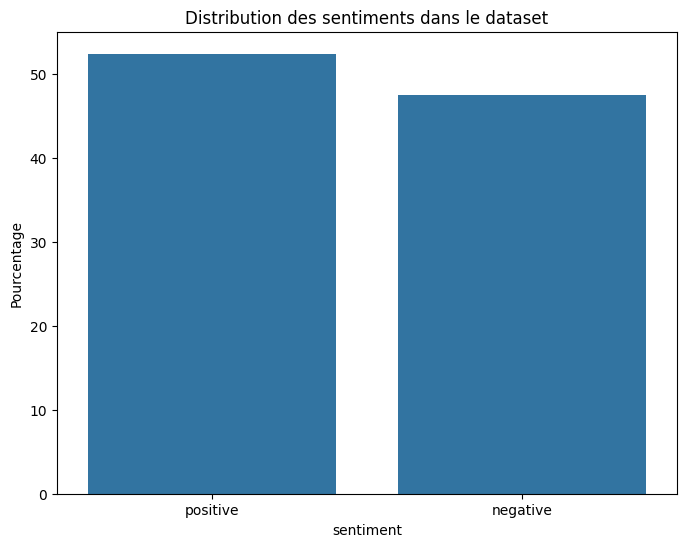

In [4]:
# Visualisation
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_percentages.index, y=sentiment_percentages.values)
plt.title('Distribution des sentiments dans le dataset')
plt.ylabel('Pourcentage')
plt.show()

In [5]:
# Création de la fonction clean avec lemmatization
lemmatizer = WordNetLemmatizer()
stopwordsenglish = set(stopwords.words('english'))

def clean(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    
    # Lemmatization et suppression de la ponctuation et des stopwords
    cleaned_tokens = []
    for token in tokens:
        # Vérifier si le token est alphanumérique et n'est pas un stopword
        if token.isalnum() and token not in stopwordsenglish:
            cleaned_tokens.append(lemmatizer.lemmatize(token, pos='v'))
    
    return ' '.join(cleaned_tokens)

In [6]:
# Test de la fonction
test_phrase = "You are better when I am well."
print("Phrase originale:", test_phrase)
print("Phrase nettoyée:", clean(test_phrase))

Phrase originale: You are better when I am well.
Phrase nettoyée: better well


In [7]:
# Application de la fonction clean à la colonne text
df['clean'] = df['text'].apply(clean)

# Préparation des données pour l'entraînement
X = df['clean']
y = df['sentiment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=32)


/tmp/ipykernel_610/2289955338.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean'] = df['text'].apply(clean)


In [8]:
df

,textID,text,selected_text,sentiment,clean
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,sooo sad miss san diego
2,088c60f138,my boss is bullying me...,bullying me,negative,boss bully
3,9642c003ef,what interview! leave me alone,leave me alone,negative,interview leave alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,sons put release already buy
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive,2am feed baby fun smile coo
...,...,...,...,...,...
27474,b78ec00df5,enjoy ur night,enjoy,positive,enjoy ur night
27475,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,wish could come see u denver husband lose job ...
27476,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,wonder rake client make clear force devs learn...
27477,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,yay good enjoy break probably need hectic week...


In [9]:
# Initialisation des vectorizers
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

# Transformation des données avec CountVectorizer
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# Transformation des données avec TfidfVectorizer
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Entraînement des modèles
models = {
    'LogisticRegression_Count': LogisticRegression(random_state=32, max_iter=1000),
    'LogisticRegression_TFIDF': LogisticRegression(random_state=32, max_iter=1000)
}


In [10]:
# Dictionnaire pour stocker les résultats
results = {}

# Entraînement et évaluation des modèles
for name, model in models.items():
    if 'Count' in name:
        model.fit(X_train_count, y_train)
        y_pred = model.predict(X_test_count)
    else:
        model.fit(X_train_tfidf, y_train)
        y_pred = model.predict(X_test_tfidf)
    
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    print(f"\nRésultats pour {name}:")
    print("Accuracy:", accuracy)
    print("\nRapport de classification:")
    print(classification_report(y_test, y_pred))


Résultats pour LogisticRegression_Count:
Accuracy: 0.8623808359814227

Rapport de classification:
              precision    recall  f1-score   support

    negative       0.85      0.86      0.86      1935
    positive       0.87      0.86      0.87      2156

    accuracy                           0.86      4091
   macro avg       0.86      0.86      0.86      4091
weighted avg       0.86      0.86      0.86      4091


Résultats pour LogisticRegression_TFIDF:
Accuracy: 0.8667807382058177

Rapport de classification:
              precision    recall  f1-score   support

    negative       0.85      0.87      0.86      1935
    positive       0.88      0.87      0.87      2156

    accuracy                           0.87      4091
   macro avg       0.87      0.87      0.87      4091
weighted avg       0.87      0.87      0.87      4091



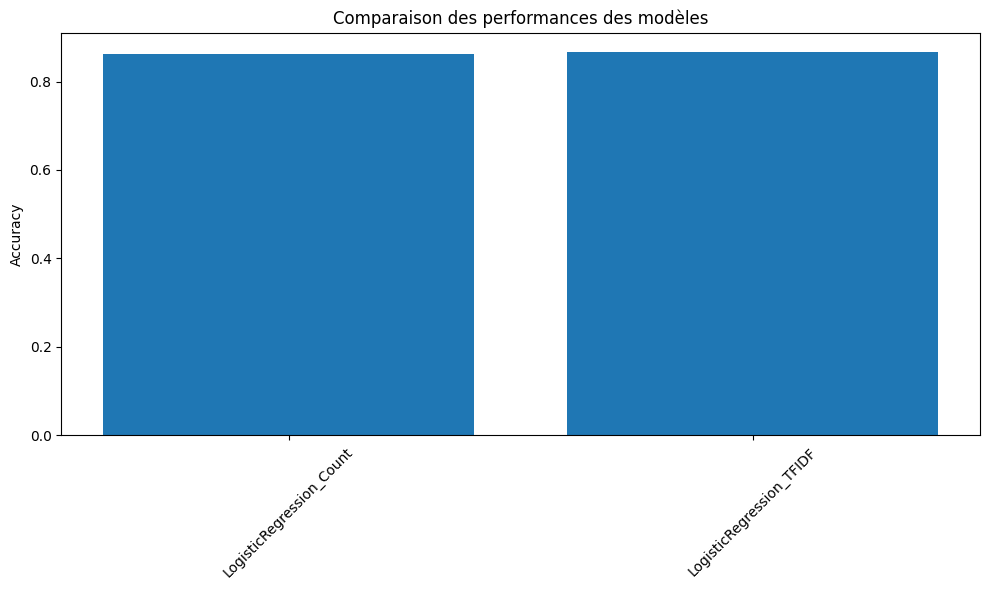

In [11]:
# Visualisation des résultats
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.title('Comparaison des performances des modèles')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
# Amélioration du modèle avec GridSearchCV
from sklearn.model_selection import GridSearchCV

# Paramètres à tester pour TfidfVectorizer et LogisticRegression
tfidf_params = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'vectorizer__max_features': [None, 5000, 10000],
    'clf__C': [0.1, 1.0, 10.0],
}

# Pipeline pour TF-IDF
from sklearn.pipeline import Pipeline
tfidf_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('clf', LogisticRegression(random_state=32, max_iter=1000))
])

# GridSearch avec validation croisée
grid_search = GridSearchCV(tfidf_pipeline, tfidf_params, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Meilleurs paramètres et score
print("\nMeilleurs paramètres:", grid_search.best_params_)
print("Meilleur score de validation croisée:", grid_search.best_score_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits

Meilleurs paramètres: {'clf__C': 1.0, 'vectorizer__max_features': 10000, 'vectorizer__ngram_range': (1, 2)}
Meilleur score de validation croisée: 0.8631847584142935


In [13]:
# Évaluation sur le jeu de test
y_pred_best = grid_search.predict(X_test)
print("\nScore sur le jeu de test:", accuracy_score(y_test, y_pred_best))
print("\nRapport de classification détaillé:")
print(classification_report(y_test, y_pred_best))


Score sur le jeu de test: 0.868247372280616

Rapport de classification détaillé:
              precision    recall  f1-score   support

    negative       0.85      0.87      0.86      1935
    positive       0.88      0.86      0.87      2156

    accuracy                           0.87      4091
   macro avg       0.87      0.87      0.87      4091
weighted avg       0.87      0.87      0.87      4091



Les résultats montrent que :

1. La distribution des sentiments est assez équilibrée : 52.45% positifs et 47.55% négatifs.

2. Les deux approches (CountVectorizer et TfidfVectorizer) donnent de bons résultats, avec un léger avantage pour TfidfVectorizer :
- CountVectorizer : 86.24% d'accuracy
- TfidfVectorizer : 86.68% d'accuracy

3. L'optimisation des hyperparamètres avec GridSearchCV a permis d'identifier les meilleurs paramètres :
- Utilisation de bigrammes (ngram_range=(1,2))
- 10000 features maximum
- Paramètre de régularisation C=1.0

4. Le modèle final atteint une accuracy de 86.82% sur le jeu de test, avec des performances équilibrées entre les classes positives et négatives (F1-scores de 0.86 et 0.87 respectivement).